In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [11]:
from scipy import stats

In [12]:
with open('Sample_0701222022-07-06 14.23.11.249_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-07-06 14:23:11.243158,1164.49911,2137.05266,0
1,2022-07-06 14:23:11.252759,1164.49911,2137.05266,0
2,2022-07-06 14:23:11.262358,1164.49697,2137.05266,0
3,2022-07-06 14:23:11.271959,1164.49697,2137.05266,0
4,2022-07-06 14:23:11.281559,1164.49923,2137.05266,0
...,...,...,...,...
427781,2022-07-06 15:31:37.933088,1141.40017,2137.05266,0
427782,2022-07-06 15:31:37.942688,1141.40017,2137.05266,0
427783,2022-07-06 15:31:37.952288,1141.40017,2137.05266,0
427784,2022-07-06 15:31:37.961887,1141.39957,2137.05266,0


In [13]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [14]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


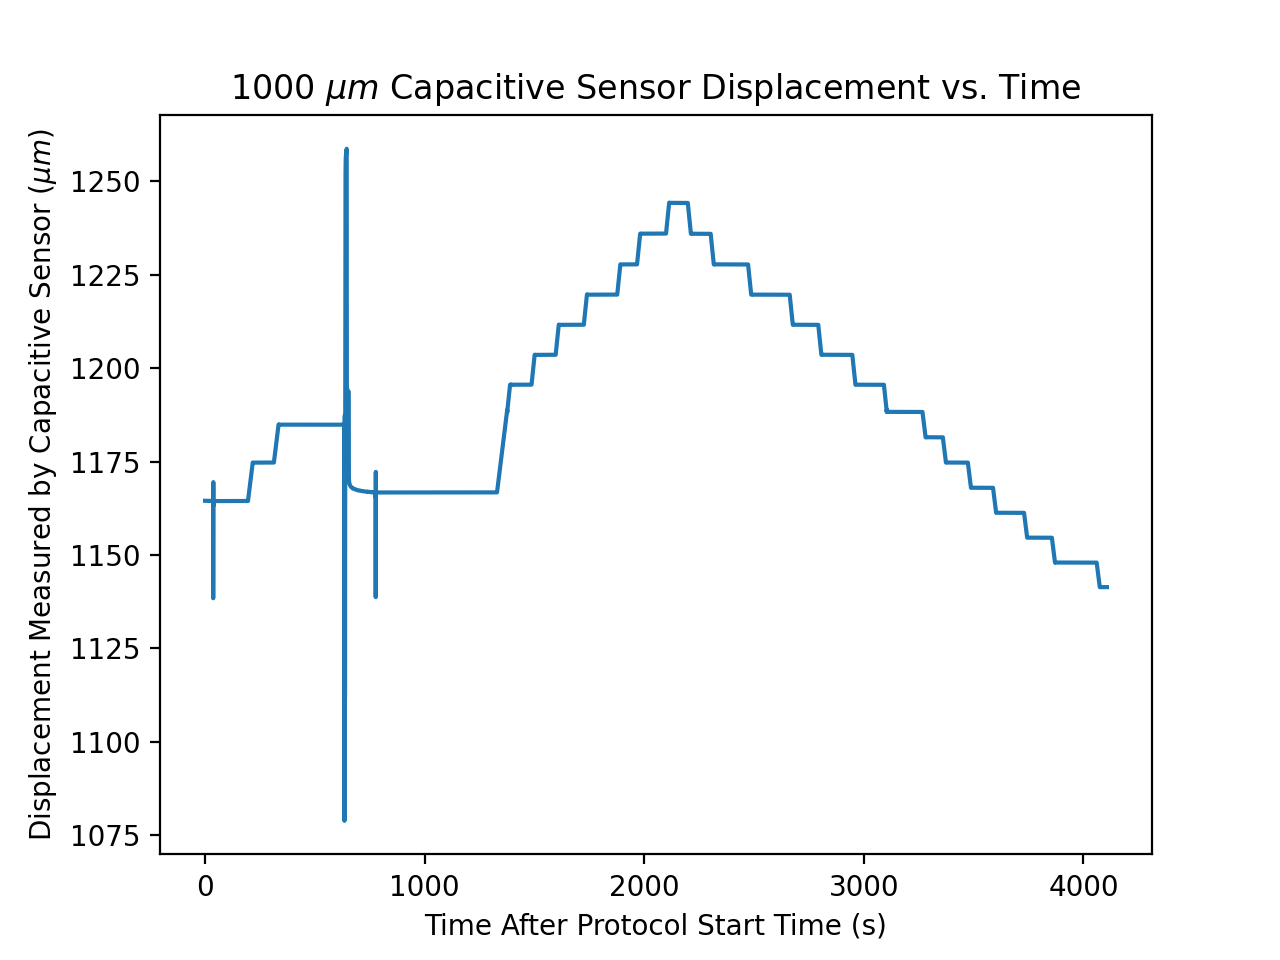

Text(0.5, 1.0, '1000 $\\mu m$ Capacitive Sensor Displacement vs. Time')

In [15]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('1000 $\mu m$ Capacitive Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


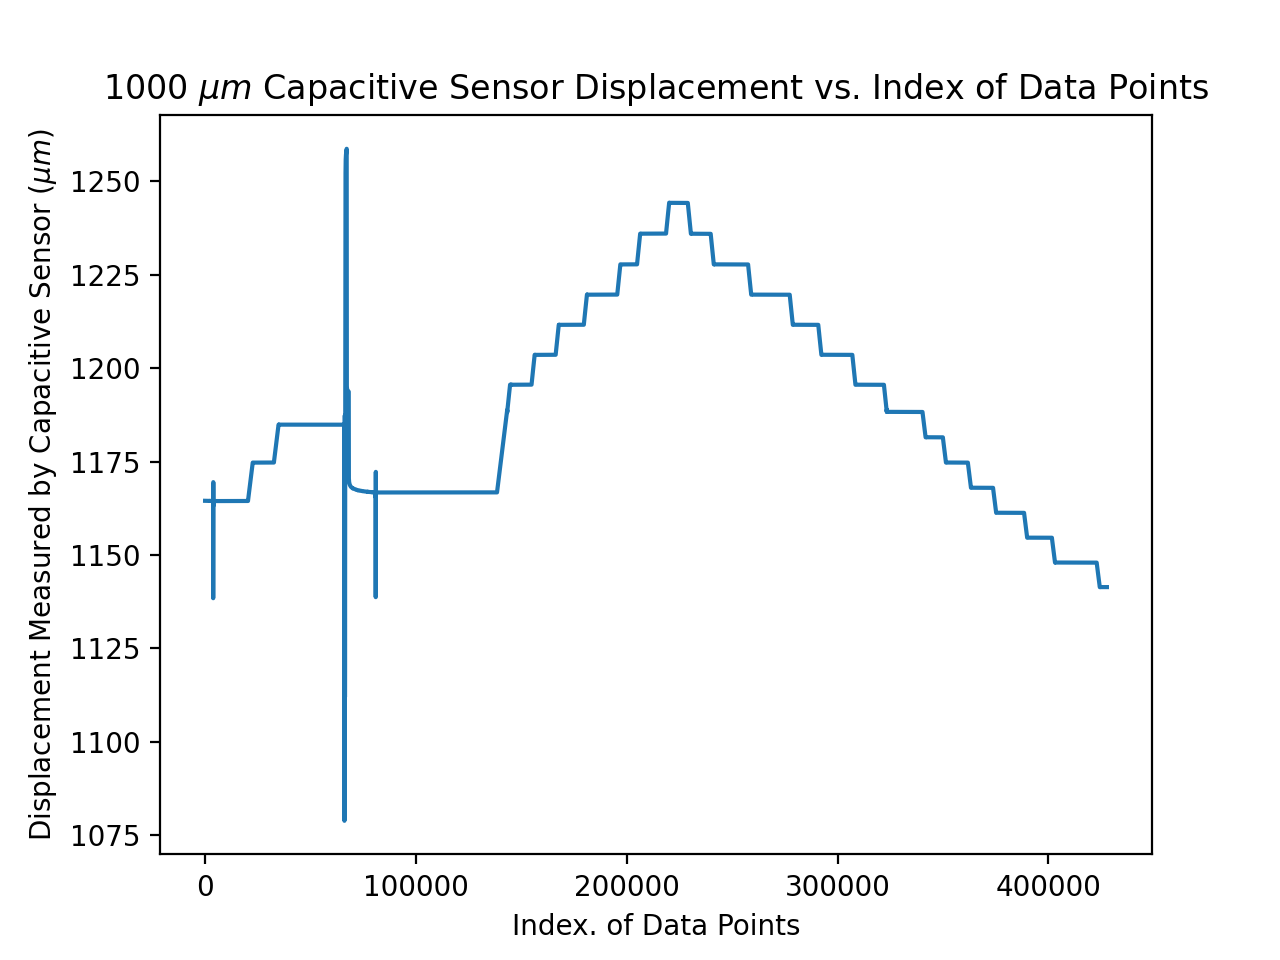

Text(0.5, 1.0, '1000 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [22]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])

plt.xlabel('Index. of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('1000 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [16]:
start=65000
end=67000

In [17]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

1189.716284289999
44.90679906954226


In [18]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [19]:
info = stats.linregress(x,y)
info

LinregressResult(slope=3.1990275963341768, intercept=1159.0210252278948, rvalue=0.39493378314188504, pvalue=1.2134939275791893e-75, stderr=0.16648465404017662, intercept_stderr=1.844808072783413)

<IPython.core.display.Javascript object>


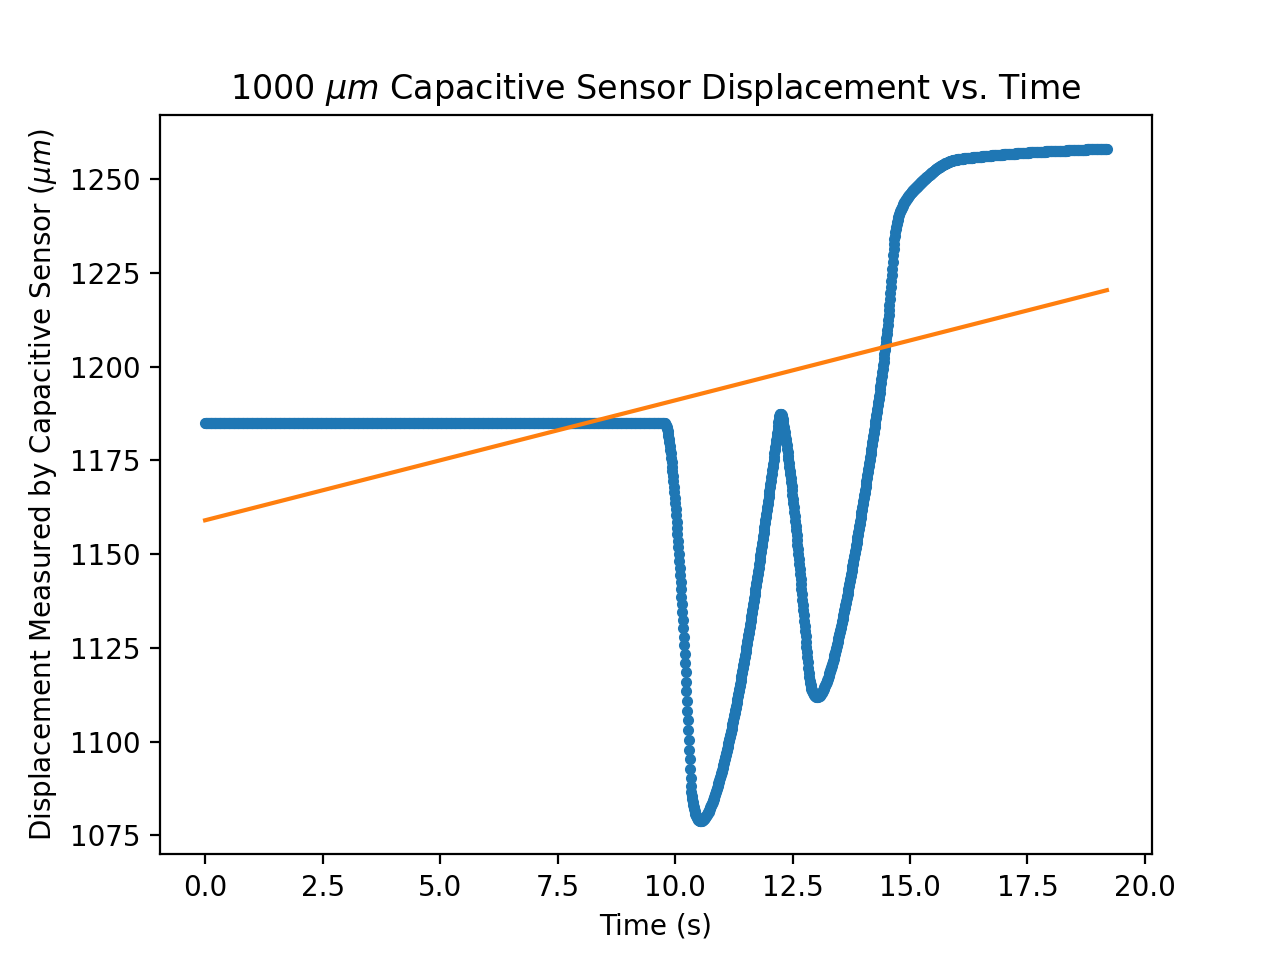

In [20]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor ($\mu m$)')
plt.title('1000 $\mu m$ Capacitive Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)